In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


## Exploratory Data Analysis

In [4]:
df.isnull().sum()   # no missing values

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
df.duplicated().sum()   # duplicates identified

1024

In [6]:
df.drop_duplicates(inplace=True)   # duplicates removed
df.duplicated().sum()

0

In [7]:
df= df.drop(columns=['Unnamed: 0'])  # dropping irrelevant column
df.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

<Axes: >

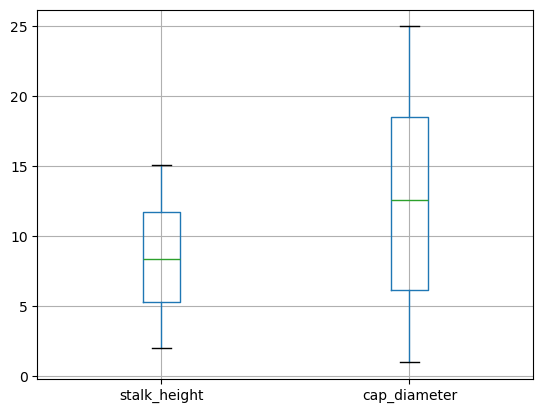

In [8]:
df.boxplot()   # boxplot visualization - no outliers

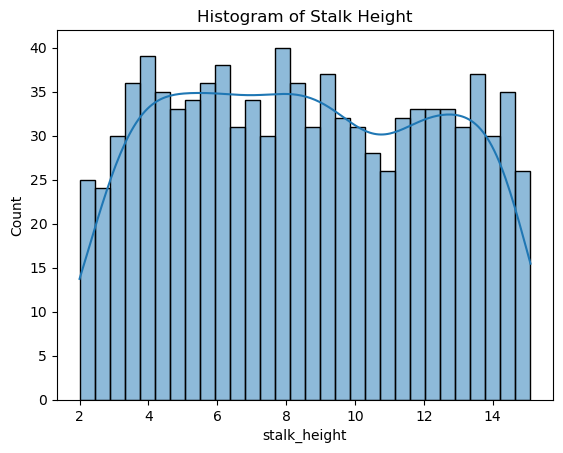

In [9]:
sns.histplot(df['stalk_height'],bins=30,kde=True)  # Histograms
plt.title('Histogram of Stalk Height')
plt.show()

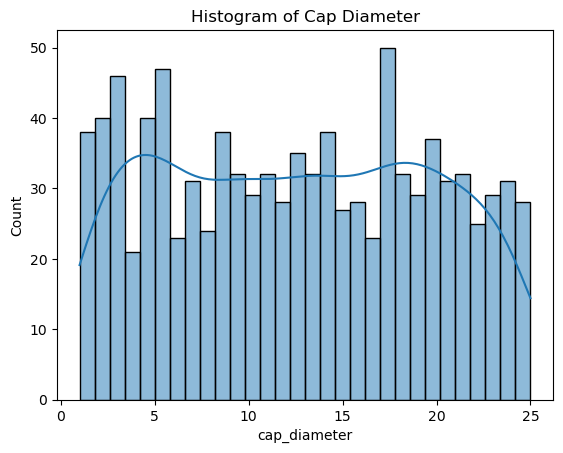

In [10]:
sns.histplot(df['cap_diameter'],bins=30,kde=True)   
plt.title('Histogram of Cap Diameter')
plt.show()

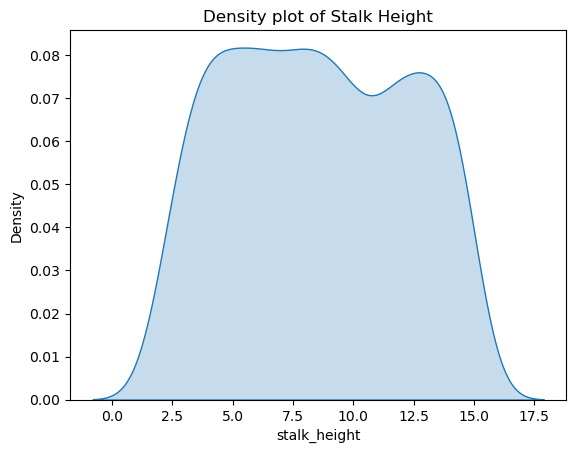

In [11]:
sns.kdeplot(df['stalk_height'],fill=True)   # Density plots
plt.title('Density plot of Stalk Height')
plt.show()

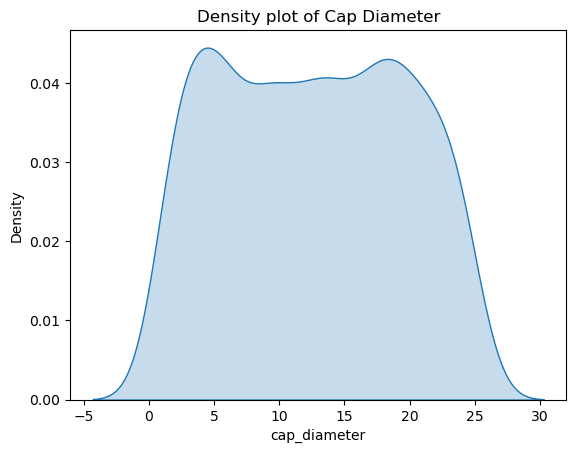

In [12]:
sns.kdeplot(df['cap_diameter'],fill=True)   
plt.title('Density plot of Cap Diameter')
plt.show()

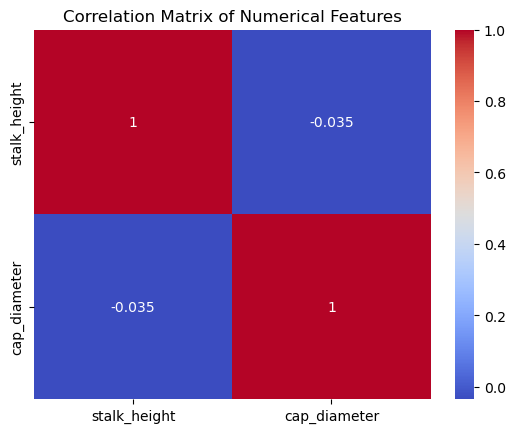

In [13]:
corr= df[['stalk_height','cap_diameter']].corr()    # correlation matrix
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data preprocessing

In [15]:
df_cat= df.select_dtypes(include=['object','category']).columns

In [16]:
df_encoded= pd.get_dummies(df,columns=df_cat,drop_first=True)  # OneHot encoding for categorical columns
df_encoded.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14.276173,5.054983,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
1,3.952715,19.068319,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,9.054265,7.205884,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,5.226499,20.932692,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.037532,12.545245,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [17]:
x= df_encoded.drop(columns=['class_poisonous'])  # features
y= df_encoded['class_poisonous']   # target

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42) # splitting dataset

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 104)
(196, 104)
(780,)
(196,)


In [20]:
scaler= StandardScaler()   # standardizing
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

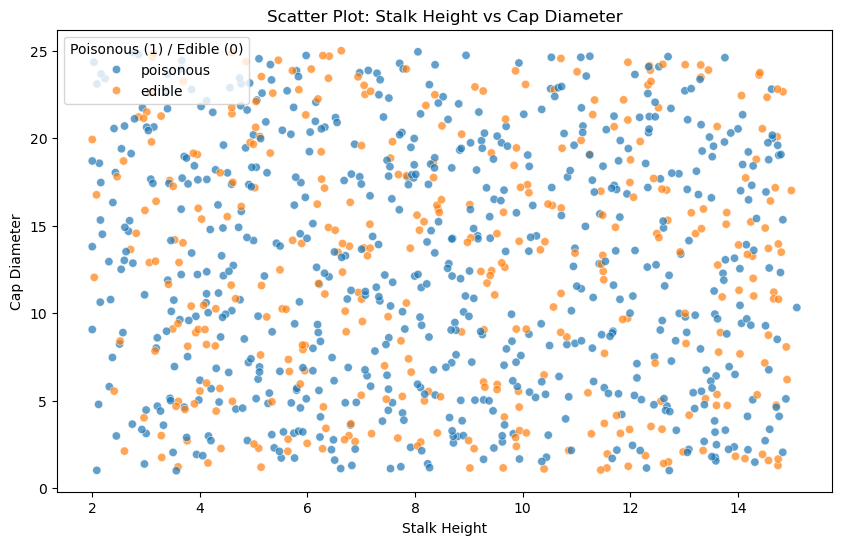

In [21]:
## scatter plot for numerical features
plt.figure(figsize=(10,6))
sns.scatterplot(x= df['stalk_height'], y=df['cap_diameter'],hue= df['class'],alpha= 0.7)
plt.title('Scatter Plot: Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.legend(title= 'Poisonous (1) / Edible (0)')
plt.show()

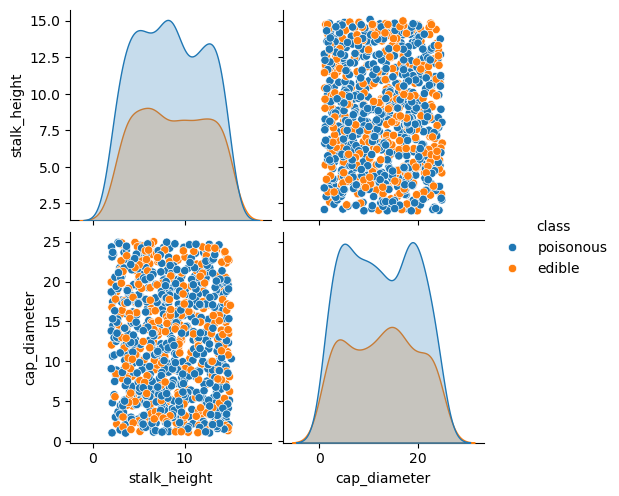

In [22]:
# pairplot for numerical featurs
sns.pairplot(df, vars=['stalk_height','cap_diameter'],hue='class',diag_kind='kde')
plt.show()

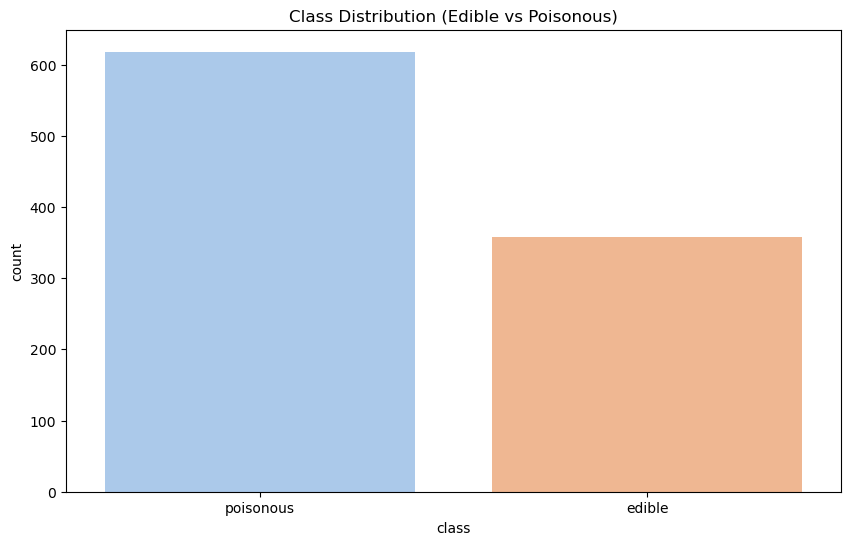

In [23]:
# class distributions
plt.figure(figsize=(10,6))
sns.countplot(x='class',data=df,palette='pastel')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

## SVM implementation

In [25]:
svm= SVC(kernel='linear',random_state=42)  # Training SVM model
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [26]:
y_pred= svm.predict(x_test)   # making predictions
y_pred= y_pred.astype(int)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [27]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       0.39      0.17      0.23        72\n        True       0.64      0.85      0.73       124\n\n    accuracy                           0.60       196\n   macro avg       0.51      0.51      0.48       196\nweighted avg       0.54      0.60      0.55       196\n'

In [28]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.5969387755102041

In [29]:
confusion_matrix(y_test,y_pred)

array([[ 12,  60],
       [ 19, 105]], dtype=int64)

## Visualizations

In [31]:
from sklearn.decomposition import PCA

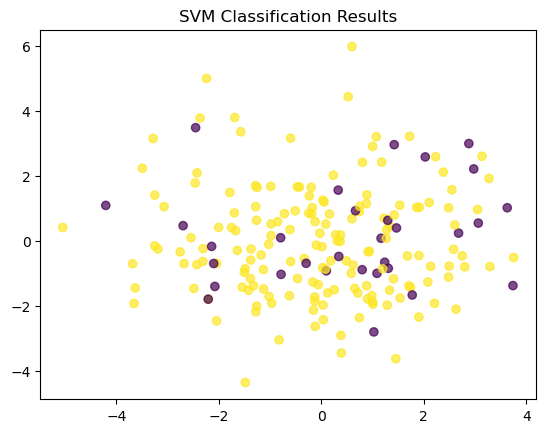

In [32]:
pca= PCA(n_components=2)
x_pca= pca.fit_transform(x_test)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,cmap='viridis',alpha=0.7)
plt.title('SVM Classification Results')
plt.show()

## Parameter Tuning & Optimization

In [34]:
kernels= ['linear','poly','rbf']
for kernel in kernels:
    svm= SVC(kernel=kernel,random_state=42)
    svm.fit(x_train,y_train)
    y_pred= svm.predict(x_test)
    print(f'Kernel: {kernel}')
    print('Accuracy:',accuracy_score(y_test,y_pred))


Kernel: linear
Accuracy: 0.5969387755102041
Kernel: poly
Accuracy: 0.6326530612244898
Kernel: rbf
Accuracy: 0.6326530612244898


## Comparison & Analysis

In [36]:
results=[]
for kernel in kernels:
    svm= SVC(kernel=kernel,random_state=42)
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    results.append((kernel,accuracy))

In [37]:
results

[('linear', 0.5969387755102041),
 ('poly', 0.6326530612244898),
 ('rbf', 0.6326530612244898)]

In [38]:
results_df= pd.DataFrame(results,columns=['Kernel','Accuracy'])
results_df

,Kernel,Accuracy
0,linear,0.596939
1,poly,0.632653
2,rbf,0.632653


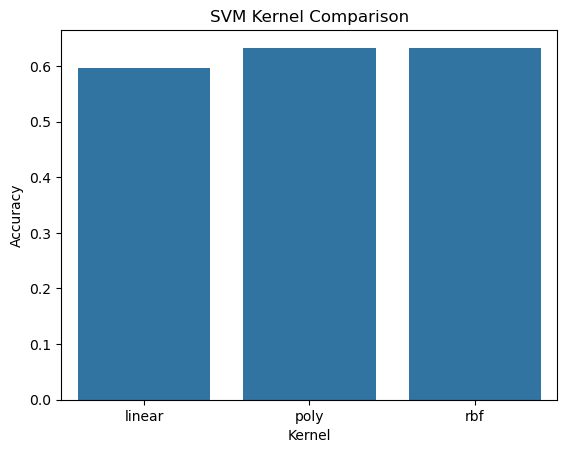

In [39]:
sns.barplot(data=results_df,x='Kernel',y='Accuracy')
plt.title('SVM Kernel Comparison')
plt.show()